# Nube de Palabras 
**Actividad 9**

Alicia Christyna Martínez Parra

In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from utils import path_loader as p

In [3]:
# Load csv file
try:
    df = pd.read_csv(p.generate_file_path(
        file_name='avocado_prices_processed', file_extension='csv', directory='output'))

    n_row, n_col = df.shape
    print(f'CSV File loaded succesfully!\nThere are {n_row} rows and {n_col} columns')
except Exception as e:
    print(f'Something wrong happended!: {e}')

CSV File loaded succesfully!
There are 18249 rows and 13 columns


In [4]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [5]:
# Preprocess the text
def preprocess_text(text):
    """
    Cleans the input text for word cloud generation.
    """
    text = str(text).lower()  # Convert to lowercase
    text = ''.join(c for c in text if c.isalnum() or c.isspace())  # Remove punctuation
    return text

df['cleaned_text'] = df['type'].apply(preprocess_text)

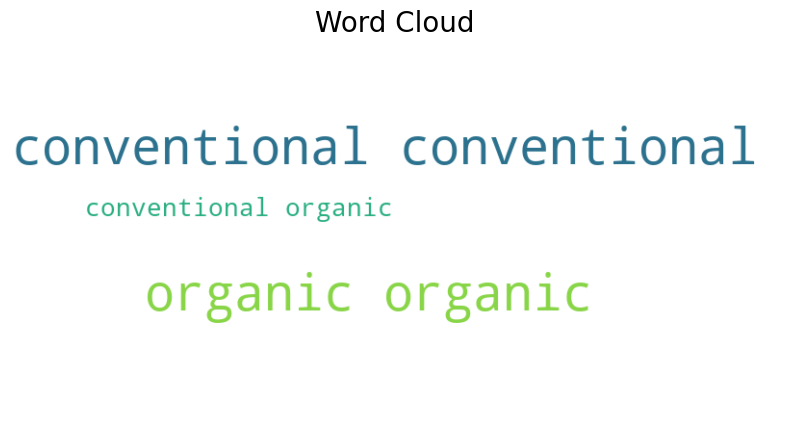

In [6]:
# Combine all text into a single string
all_text = ' '.join(df['cleaned_text'].tolist())

# Create the Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    colormap='viridis'
).generate(all_text)

# Visualize the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Word Cloud", fontsize=20)
plt.show()